In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to E:\anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#reading data from excel
main_df = pd.read_excel('main.xlsx')

In [4]:
main_df

,Fragrance,By,Image,Description
0,Bright Crystal,Versace,https://img.perfume.com/images/products/sku/sm...,bright crystal versac perfum rejuven refresh s...
1,Light Blue,Dolce & Gabbana,https://img.perfume.com/images/products/sku/sm...,light blue dolc gabbana perfum appli dolc gabb...
2,Jimmy Choo,Jimmy Choo,https://img.perfume.com/images/products/sku/sm...,jimmi choo jimmi choo perfum name synonym luxu...
3,Eternity,Calvin Klein,https://img.perfume.com/images/products/sku/sm...,etern calvin klein perfum rediscov passion fem...
4,Pink Sugar,Aquolina,https://img.perfume.com/images/products/sku/sm...,pink sugar aquolina perfum think pink sugar tw...
...,...,...,...,...
955,Bodycology Cherry Blossom Cedarwood And Pear,Bodycology,https://img.perfume.com/images/products/sku/sm...,Bodycology Cherry Blossom Cedarwood And Pear b...
956,Beyonce Heat Kissed,Beyonce,https://img.perfume.com/images/products/sku/sm...,Beyonce Heat Kissed by Beyonce Perfume. Wear H...
957,4711 Acqua Colonia Blood Orange & Basil,4711,https://img.perfume.com/images/products/sku/sm...,4711 Acqua Colonia Blood Orange & Basil by 471...
958,24 Elixir Neroli,Scentstory,https://img.perfume.com/images/products/sku/sm...,24 Elixir Neroli by Scentstory Cologne. 24 Eli...


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fragrance    960 non-null    object
 1   By           960 non-null    object
 2   Image        960 non-null    object
 3   Description  960 non-null    object
dtypes: object(4)
memory usage: 30.1+ KB


In [6]:
main_df.describe()

,Fragrance,By,Image,Description
count,960,960,960,960
unique,958,215,958,959
top,Modern Muse,Calvin Klein,https://img.perfume.com/images/products/sku/sm...,wind song princ matchabelli perfum creat 1952 ...
freq,2,33,2,2


In [7]:
main_df.drop_duplicates(inplace = True)

In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 959
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fragrance    959 non-null    object
 1   By           959 non-null    object
 2   Image        959 non-null    object
 3   Description  959 non-null    object
dtypes: object(4)
memory usage: 37.5+ KB


In [9]:
def clean_text(text):
    #make text lower case
    text = text.lower()
    #remove stop words
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    #remove punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    #stem words
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

In [10]:
main_df['Description'] = main_df.Description.apply(clean_text)

In [11]:
main_df.head()

,Fragrance,By,Image,Description
0,Bright Crystal,Versace,https://img.perfume.com/images/products/sku/sm...,bright crystal versac perfum rejuven refresh s...
1,Light Blue,Dolce & Gabbana,https://img.perfume.com/images/products/sku/sm...,light blue dolc gabbana perfum appli dolc gabb...
2,Jimmy Choo,Jimmy Choo,https://img.perfume.com/images/products/sku/sm...,jimmi choo jimmi choo perfum name synonym luxu...
3,Eternity,Calvin Klein,https://img.perfume.com/images/products/sku/sm...,etern calvin klein perfum rediscov passion fem...
4,Pink Sugar,Aquolina,https://img.perfume.com/images/products/sku/sm...,pink sugar aquolina perfum think pink sugar tw...


In [12]:
#Fit TFIDF 
#Learn vocabulary and tfidf from all style_ids.
tf = TfidfVectorizer(analyzer='word', 
                     min_df=10,
                     ngram_range=(1, 2),
                     #max_features=1000,
                     stop_words='english')
tf.fit(main_df['Description'])

#Transform style_id products to document-term matrix.
tfidf_matrix = tf.transform(main_df['Description'])

print(tfidf_matrix.shape)

(959, 1333)


In [13]:
# Compress with SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)   #500
latent_matrix = svd.fit_transform(tfidf_matrix)

print(latent_matrix.shape)

(959, 500)


In [14]:
n = 25 #pick components
#Use elbow and cumulative plot to pick number of components. 
#Need high ammount of variance explained. 
doc_labels = main_df['Fragrance']
svd_feature_matrix = pd.DataFrame(latent_matrix[:,0:n] ,index=doc_labels)
print(svd_feature_matrix.shape)
svd_feature_matrix.head()

(959, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Fragrance,,,,,,,,,,,,,,,,,,,,,
Bright Crystal,0.186023,0.067067,-0.079168,0.017677,0.003714,-0.003262,-0.053653,0.024732,-0.000926,-0.016618,...,-0.005118,-0.048675,0.001887,0.000476,0.022437,0.038792,0.032043,0.182781,-0.066797,-0.027983
Light Blue,0.231090,-0.009461,-0.058568,-0.046141,0.520713,-0.125803,0.082820,0.089513,0.037863,-0.003670,...,-0.006954,-0.057622,-0.011591,0.010955,0.024171,-0.037655,0.009060,0.040794,-0.008889,0.066670
Jimmy Choo,0.207885,0.024288,-0.032915,0.000309,0.013073,0.054990,-0.016817,-0.004307,0.030082,0.005535,...,0.017917,0.019714,0.003307,-0.018178,-0.033812,0.019917,-0.016046,0.004235,0.036425,-0.010354
Eternity,0.224619,0.494642,0.437696,-0.029415,0.045799,0.054260,0.004954,-0.021750,-0.028022,-0.002614,...,-0.092253,0.072325,-0.035168,0.027892,-0.038954,-0.044067,0.044568,-0.011204,0.006916,0.063553
Pink Sugar,0.199189,0.016962,-0.044935,0.029250,-0.009097,0.019822,-0.038489,0.022162,0.011736,0.010151,...,-0.048462,-0.077322,0.020918,-0.001315,-0.045846,0.086400,0.040653,-0.056666,0.014601,-0.044188


In [15]:
liked_scents = input("Enter the scents that you like :")

Enter the scents that you like :Mint, Apples, Orange, beaches, Summer


In [16]:
liked_scents = clean_text(liked_scents)
liked_scents

'mint appl orang beach summer'

In [17]:
def get_message_tfidf_embedding_vector(message):
    message_array = tf.transform([message]).toarray()
    message_array = svd.transform(message_array)
    message_array = message_array[:,0:25].reshape(1, -1)
    return message_array

In [18]:
liked_scents_array = get_message_tfidf_embedding_vector(liked_scents)

In [19]:
liked_scents_array

array([[ 0.06283713,  0.0340955 , -0.00456549,  0.00318895,  0.01864855,
         0.02374634, -0.01421003,  0.04410372, -0.02259292, -0.00097176,
         0.01224285, -0.00716634, -0.0375522 , -0.01843727, -0.00992904,
        -0.0314368 , -0.03958682,  0.01899384, -0.01420274,  0.03920078,
        -0.019255  ,  0.01496117, -0.0060883 ,  0.01492954,  0.03871893]])

In [20]:
def get_similarity_scores(message_array, embeddings):
    cosine_sim_matrix = pd.DataFrame(cosine_similarity(X=embeddings,Y=message_array,dense_output=True))
    cosine_sim_matrix.set_index(embeddings.index, inplace=True)
    cosine_sim_matrix.columns = ["cosine_similarity"]
    return cosine_sim_matrix

In [21]:
similar_items = get_similarity_scores(liked_scents_array, svd_feature_matrix)
similar_items.sort_values(by="cosine_similarity", ascending=False, inplace=True)

In [22]:
similar_items

,cosine_similarity
Fragrance,
Halloween Blue Drop,0.775433
Calyx,0.732209
Un Jardin Sur Le Nil,0.718521
I Love Love,0.685607
Laila,0.681775
...,...
Heliotrope Blanc,-0.089254
Diamonds & Emeralds,-0.093262
Mon Guerlain Sensuelle,-0.111121


In [23]:
disliked_scents = input("Enter the scents that you dislike :")

Enter the scents that you dislike :Melons, Pears, honeysuckle, winter


In [24]:
disliked_scents = clean_text(disliked_scents)
disliked_scents

'melon pear honeysuckl winter'

In [25]:
disliked_scents_array = get_message_tfidf_embedding_vector(disliked_scents)

In [26]:
disliked_scents_array

array([[ 0.03715376,  0.00408165, -0.01140519,  0.01084287,  0.00171816,
         0.03670695, -0.01426177,  0.01503113,  0.00478679, -0.00951206,
         0.00193191,  0.00249429, -0.00218823, -0.0009004 ,  0.00178584,
        -0.00192621, -0.01271943,  0.00354538, -0.01284479,  0.01127751,
         0.01657283, -0.00029646,  0.02065558,  0.01085139, -0.0040871 ]])

In [27]:
dissimilar_items = get_similarity_scores(disliked_scents_array, svd_feature_matrix)
dissimilar_items.sort_values(by="cosine_similarity", ascending=False, inplace=True)

In [28]:
dissimilar_items

,cosine_similarity
Fragrance,
Killer Queen,0.798238
Cartier La Panthere,0.771394
Bon Bon,0.734937
Jeanne Lanvin,0.700250
Moschino Pink Fresh Couture,0.693642
...,...
Michael Kors,-0.070352
Michael Kors 24k Brilliant Gold,-0.089302
Michael Kors Sporty Citrus,-0.090271


In [29]:
dissimilar_items = dissimilar_items.query('cosine_similarity > 0.45')

In [30]:
dissimilar_items

,cosine_similarity
Fragrance,
Killer Queen,0.798238
Cartier La Panthere,0.771394
Bon Bon,0.734937
Jeanne Lanvin,0.700250
Moschino Pink Fresh Couture,0.693642
...,...
Cashmere Aura,0.452417
Jovan Black Musk,0.452272
Individuelle,0.452027


In [31]:
try:
    similar_items = similar_items.drop(dissimilar_items.index)
except:
    pass

In [32]:
similar_items = similar_items.head()

In [33]:
import matplotlib.pyplot as plt
from skimage import io
from textwrap import wrap

In [34]:
def view_recommendations(recs):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,10))
    ax = axes.ravel()

    for i in range(len(recs)):
        single_name = recs.index.tolist()[i]
        single_frag = main_df.query('Fragrance==@single_name')
        name = single_frag.Fragrance.values[0]
        by = single_frag.By.values[0]
        title = "{} \n by: {}".format(name, by)
        
        frag_image = single_frag.Image.values[0]
        image = io.imread(frag_image)
        ax[i].imshow(image)
        ax[i].set_yticklabels([])
        ax[i].set_xticklabels([])
        ax[i].set_title("\n".join(wrap(title, 20)))
        ax[i].axis('off')

    plt.show()

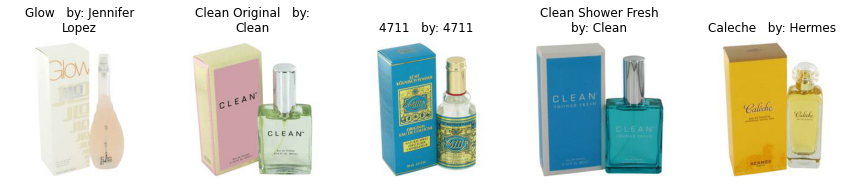

In [35]:
view_recommendations(similar_items)